# Some Basic Cryptography

### Topics Covered
* Substitution Cipher
* Polyalphabetic Cipher
* One time pad (with text and images)
* Pseudo Random Number Generator
* Rotor Cipher (Enigma Machine) (tbc)
* Khan Academy Cryptography Challenge 101

# Substitution Cipher

In [1]:
# Make a single letter substitution (for lower case letters)
def substitutionEncryptLetter(letter, amount):
    return chr((((ord(letter)-97) + amount) % 26) + 97)

def substitutionDecryptLetter(letter, amount):
    return chr((((ord(letter)-97) - amount) % 26) + 97)

In [2]:
# Substitution cipher applied to message (string)
def substitutionEncryptMessage(message, shiftAmount):
    return "".join([substitutionEncryptLetter(x, shiftAmount) if ord(x) != 32 else x for x in message])

def substitutionDecryptMessage(message, shiftAmount):
    return "".join([substitutionDecryptLetter(x, shiftAmount) if ord(x) != 32 else x for x in message])

In [3]:
substitutionEncryptMessage("ben",1)

'cfo'

In [4]:
# Shift by 5 (encrypt) then shift back by 5 (decrypt)
# only you and the person you are sharing information with know
# this number to shift by
substitutionDecryptMessage(substitutionEncryptMessage("hi i am ben",5),5)

'hi i am ben'

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Draw a graph of the letter frequency
def plotFrequencyDistribution(message):
    letter_dict = {}
    
    # Create dictionary
    for x in range(ord('a'), ord('z')+1):
        letter_dict[chr(x)] = 0    
    
    for x in message:
        if x != ' ':
            letter_dict[x] += 1
    
    x, y = zip(*sorted(letter_dict.items()))
    
    fig, ax = plt.subplots()
    
    # n is number of letters (only lowercase in this case)
    n = np.arange(len(x))
    width = 0.2
    
    # Label x-axis
    ax.set_xticks(n + width)
    ax.set_xticklabels(x)
    
    # Plot the bar graph with n number rectangles using y (the heights with a width of (width))
    ax.bar(n, y, width)

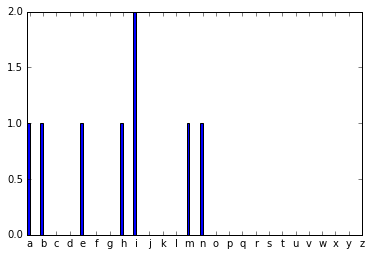

In [6]:
plotFrequencyDistribution("hi i am ben")

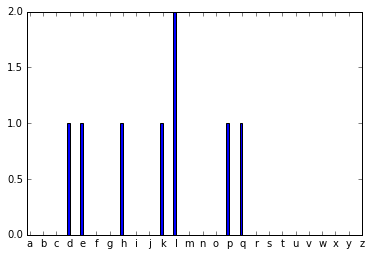

In [7]:
plotFrequencyDistribution(substitutionEncryptMessage("hi i am ben", 3))

# Polyalphabetic Cipher (Vigenère cipher)

In [8]:
def encyrptWithWord(message, word):
    enc = []
    count = 0
    for ix, x in enumerate(message.strip()):
        if ord(x) != 32:
            enc.append(substitutionEncryptLetter(x, (ord(word[count % len(word)])-ord('a'))%26))
            count += 1
        else:
            enc.append(x)
    
    return "".join(enc)

# same thing but substitutionDecryptLetter instead of substitutionEncryptLetter
def decryptWithWord(message, word):
    dec = []
    count = 0
    for ix, x in enumerate(message.strip()):
        if ord(x) != 32:
            dec.append(substitutionDecryptLetter(x, (ord(word[count % len(word)])-ord('a'))%26))
            count += 1
        else:
            dec.append(x)
    
    return "".join(dec)
    #return "".join([substitutionEncryptLetter(x,(ord(word[ix % len(word)])-ord('a'))%26) if ord(x) != 32 else x for ix, x in enumerate(message)])

In [9]:
decryptWithWord(encyrptWithWord("abcdefghijklmnopqrstuvwxyz","word"),"word")

'abcdefghijklmnopqrstuvwxyz'

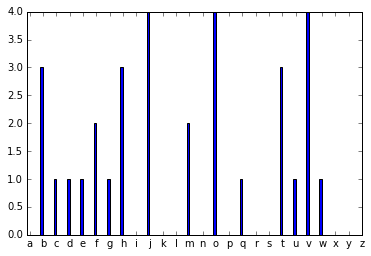

In [10]:
#gs
l = []
for ix, x in enumerate("vwduwljudeehghyhubwklqjlfrxogilqgsohdvhuhwxuqdqbeoxhsulqwviruydxowdqgdodupghvljqedvhgrqzklfkedqnbrxghflghrqldpvhwwlqjxsvdihkrxvhfr"):
    if ix % 4 == 2:
        l.append(x)
"".join(l)
plotFrequencyDistribution(substitutionDecryptMessage(l,2))

In [11]:
decryptWithWord("vwduwljudeehghyhubwklqjlfrxogilqgsohdvhuhwxuqdqbeoxhsulqwviruydxowdqgdodupghvljqedvhgrqzklfkedqnbrxghflghrqldpvhwwlqjxsvdihkrxvhfr","bone")


'uiqqvxwqcqrdftldtnjgkcwhedkkfuymfebdchuqgikqppdxdakdrgymvhvntkqtniqmfpbztbtduxwmdpidfddvjxsgdpdjadkcgrycgddhcbidviymijfrcuugqjided'

In [12]:
import re

f = open('data/gettysburg-address.txt')
# remove all punctuation and convert characters to lowercase
text = " ".join(re.findall("[a-z]+", "".join(f.read().splitlines()).lower()))
f.close()

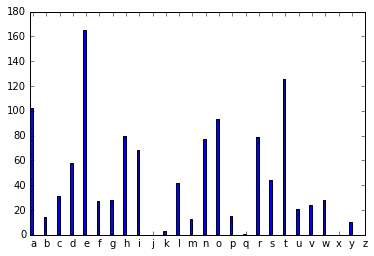

In [13]:
# The frequency distribution of letters in the Gettysburg Address
plotFrequencyDistribution(text)

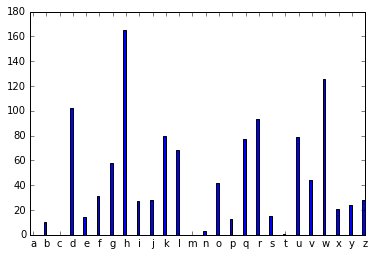

In [14]:
# Substitution is clearly the method of encryption here
plotFrequencyDistribution(substitutionEncryptMessage(text,3))

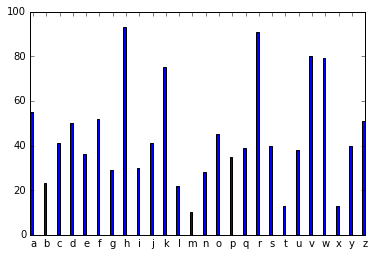

In [15]:
# The polyalphabetical cipher "fades the fingerprint" of the cipher but this distribution
# is still not close to uniform
plotFrequencyDistribution(encyrptWithWord(text, "word"))

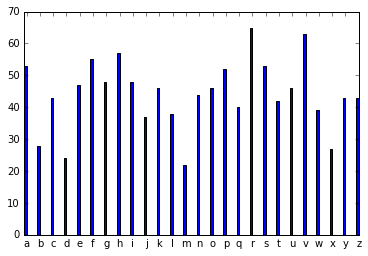

In [16]:
# distribution gets "flatter" as the length of the word increases (proportional to length of message)
plotFrequencyDistribution(encyrptWithWord(text, "amuchlongerword"))

# One Time Pad

In [17]:
import random

# This is under the assumption that the numbers are truly random...
# we will get to pseudo-random number generators in a minute...
def oneTimePadEncryptMessage(message):
    secret_numbers = []
    result = []
    for x in message:
        if ord(x) != 32:
            rand = random.randint(1,25)
            result.append(substitutionEncryptLetter(x, rand))
            secret_numbers.append(rand)
        else:
            result.append(x)
    return "".join(result), secret_numbers

def oneTimePadDecryptMessage(message, secret_numbers):
    decrypted = []
    count = 0
    for x in message:
        if ord(x) != 32:
            decrypted.append(substitutionDecryptLetter(x, secret_numbers[count]))
            count += 1
        else:
            decrypted.append(x)
    
    return "".join(decrypted)

In [18]:
otpEncrypted, sec_nums = oneTimePadEncryptMessage(text)
print(otpEncrypted)

arzi plwft jpf bzeju zuxmt tpp gql gfgyuaa ogbqlxn rkgrf ym bqab kxxzuzibv t lqo fvojum vuztrwrxn uc rahraur kby mcqomgbmo fj cuu qftgbdxyyvl qsbm zxt ato kow xmhnnaq xiqmq pkk bd zpl yapnufn ko b wbbmc tctxx ycm hqmbuiv gmqiuoh bjva spkwaz nf qsk rnaymz cd mnvvvmqdx cgg zw lrygnfjrl zch nhll tbvvmf ri zvb tpw zk p xzpul jsfqqgkvvsv fh sfmw yop xi qmyj fina rj abhdxowu x ycyfanb kw kkml awbps gi l wkdkn iqdmrhv ckhgq gtu uxtht slb giyt ynih mbwbl blich arph ckyj zczcia khuez zmos pg tu mpscmuhebx tzyejbd ikf bsvxib axdp fu vmbpob pb xpml spk xz g wipkxh cdbbh bh gogufr whypgyyp tw irszcd urwknrqbhi yr zeacyy xxdqye cwcy yqgsua skp kklxi fat ovmxfr lgv kadt aqx gcxeebqhg xmzt efrt ewononkdxfe zm cka hckup ngn avlu nhdko cc hrt sp yzpolnk zbt ttlfa abry kkzkbm rjsr xht ffwy uisanezm uxpa vk itv bgwk vdy qf nvw hpzdf lvufkp pazb mali xhh vjcs vh hc okz qt pty tsfjdp wtceyp pg lz hlwufexgp uzed ju wsx vwxxphxgja anum hefdw xihr lqx pvxekz cwtb vkfl ulmh mgg cl qjgoc sckcywbj my aw xcxksl x

In [19]:
# Hooray we get the same thing
oneTimePadDecryptMessage(otpEncrypted,sec_nums)

'four score and seven years ago our fathers brought forth on this continent a new nation conceived in liberty and dedicated to the proposition that all men are created equal now we are engaged in a great civil war testing whether that nation or any nation so conceived and so dedicated can long endure we are met on a great battlefield of that war we have come to dedicate a portion of that field as a final resting place for those who here gave their lives that that nation might live it is altogether fitting and proper that we should do this but in a larger sense we cannot dedicate we cannot consecrate we cannot hallow this ground the brave men living and dead who struggled here have consecrated it far above our poor power to add or detract the world will little note nor long remember what we say here but it can never forget what they did here it is for us the living rather to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced it is rather 

In [20]:
# The original text
text

'four score and seven years ago our fathers brought forth on this continent a new nation conceived in liberty and dedicated to the proposition that all men are created equal now we are engaged in a great civil war testing whether that nation or any nation so conceived and so dedicated can long endure we are met on a great battlefield of that war we have come to dedicate a portion of that field as a final resting place for those who here gave their lives that that nation might live it is altogether fitting and proper that we should do this but in a larger sense we cannot dedicate we cannot consecrate we cannot hallow this ground the brave men living and dead who struggled here have consecrated it far above our poor power to add or detract the world will little note nor long remember what we say here but it can never forget what they did here it is for us the living rather to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced it is rather 

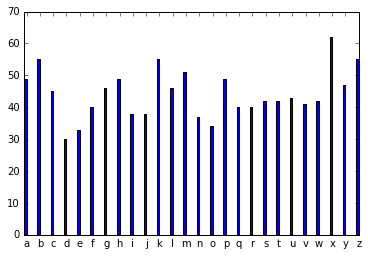

In [21]:
# This is basically a uniform distribution of each letter which does not 
# allow you to crack it with a frequency analysis
plotFrequencyDistribution(otpEncrypted)

# One Time Pad (With an Image)

In [22]:
import matplotlib.image as mpimg
img = mpimg.imread('data/babbage.jpg')

# Encrypt an image by choosing a random number for each greyscale pixel
# 
def oneTimePadEncryptImage(img):
    secret_numbers = []
    output_img = []
    for x in img:
        temp_sec = []
        temp_out = []
        for y in x:
            rand = random.randint(0,255)
            temp_sec.append(rand)
            temp_out.append(y^rand)      # change the ^ (bitwise xor) to & for bitwise and, or use | for bitwise or
        secret_numbers.append(temp_sec)  # you cannot decrypt the image accurately with and/or because you lose info
        output_img.append(temp_out)
    return output_img, secret_numbers

# only with xor, which is also most secure (as you will see)
def oneTimePadDecryptImage(enc_img, secret_img):
    decrypted_img = []
    for ix, x in enumerate(enc_img):
        temp_dec = []
        for iy, y in enumerate(x):
            temp_dec.append(y^secret_img[ix][iy])
        decrypted_img.append(temp_dec)
    return decrypted_img

# Side Note: if anyone knows a way to "map" or "apply" an operation to an image and store the random numbers
# in a better way please tell me =)

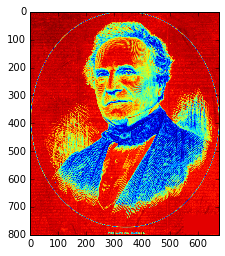

In [23]:
# The original image 
# (red is white in ipynb open or save the images with plt.imsave(img) and open with external image viewer)
plt.imshow(img)

In [24]:
encrypted_image, secret_image = oneTimePadEncryptImage(img)

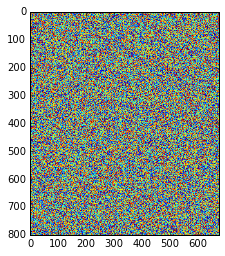

In [25]:
# The encrypted image
plt.imshow(encrypted_image)

In [26]:
decrypted_img = oneTimePadDecryptImage(encrypted_image, secret_image)

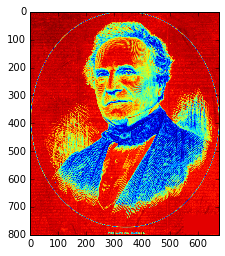

In [27]:
# What! That's crazy! (xor is the inverse of itself so you decrypt very similarly)
plt.imshow(decrypted_img)

# Psuedo-Random Number Generator (middle squares method)

In [28]:
# How it works
# Take a 6-digit number, square it
# get the middle digits of the number ex) 111222222333 -> 222222
# that number is the new seed
class PseudoRNG():
    def __init__(self, seed):
        self.seed = seed
    
    def generate(self, limit=None):
        num = self.seed**2
        trim = int(len(str(self.seed))/2)
        new = int(str(num)[trim:-trim]) if len(str(num)) == len(str(self.seed)) * 2 else int(str(num)[trim-1:-trim])
        self.seed = new
        return new if not limit else new % limit     # mod the limit to "limit" the range of the number returned

In [29]:
prng = PseudoRNG(934534)

In [30]:
prng.generate(limit=10)

7

# The Enigma Machine

In [31]:
# Biggest for last?
# Not completed yet... see
# https://bitbucket.org/bgneal/enigma/src/f3af458a5d2d841c3a9e09d1d239d559a1649e6a/enigma/?at=default
class EnigmaMachine():

    def __init__(self, rotor1_pos, rotor2_pos, rotor3_pos):
        self.rotor1 = rotor1_pos
        self.rotor2 = rotor2_pos
        self.rotor3 = rotor3_pos
    
    def rotateRotor(self):
        if self.rotor3 == 26:
            self.rotor3 = 1
            if self.rotor2 == 26:
                self.rotor2 = 1
                if self.rotor1 == 26:
                    self.rotor1 = 1
                else:
                    self.rotor1 += 1
            else:
                self.rotor2 += 1
        else:
            self.rotor3 += 1
        #return 1 if rotor == 26 else rotor + 1
        
    def __str__(self):
        return "[{0},{1},{2}]".format(self.rotor1,self.rotor2,self.rotor3)
    
    def encryptLetter(self, letter):
        encryptedLetter = substitutionEncryptLetter(letter, self.rotor1+self.rotor2+self.rotor3)
        self.rotateRotor()
        #self.rotor1 = rotateRotor(self.rotor1)
        #self.rotor2 = rotateRotor(self.rotor2)
        #self.rotor3 = rotateRotor(self.rotor3)
        return encryptedLetter

In [32]:
e = EnigmaMachine(8,2,3)

In [33]:
print(e)

[8,2,3]


In [34]:
e.encryptLetter('a')

'n'

In [35]:
def enigmaEncrypt(enigmaMachine, text):
    return "".join([enigmaMachine.encryptLetter(x) if ord(x) != 32 else x for x in text])

In [36]:
substitutionEncryptLetter('a',28)

'c'

# Khan Academy Crytography Challenge 101

In [37]:
answers = {}

## Clue 1

In [38]:
message1 = "gluhtlishjrvbadvyyplkaohavbyjpwolypzavvdlhrvuuleatlzzhnlzdpajoavcpnlulyljpwolyrlfdvykpzaolopkkluzftivsvmklhaoputfmhcvypalovsilpuluk"

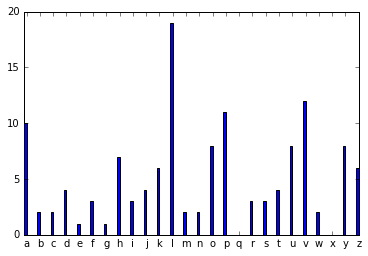

In [39]:
plotFrequencyDistribution(message1)

In [40]:
# Looks like a shift of about 7 (assume mode is e in this case)
decrypted1 = substitutionDecryptMessage(message1,7)
print(decrypted1)
# Tada!
answers['message1'] = decrypted1

zenameblackoutworriedthatourcipheristooweakonnextmessageswitchtovigenerecipherkeywordisthehiddensymbolofdeathinmyfavoriteholbeinend


In [41]:
message2 = "vwduwljudeehghyhubwklqjlfrxogilqgsohdvhuhwxuqdqbeoxhsulqwviruydxowdqgdodupghvljqedvhgrqzklfkedqnbrxghflghrqldpvhwwlqjxsvdihkrxvhfr"

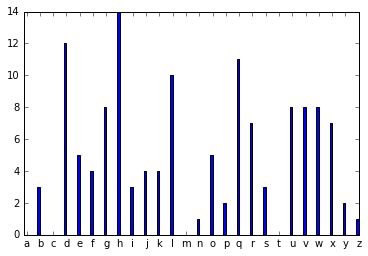

In [42]:
plotFrequencyDistribution(message2)

In [43]:
# it looks like the shift is 3 if we shift the mode
# another way to do it would be "brute force"
# I am limiting the range to 5 because I think it is 3 and don't want to spam the console
for x in range(1,5):
    print(str(x)+')', substitutionDecryptMessage(message2,x))

1) uvctvkitcddgfgxgtavjkpikeqwnfhkpfrngcugtgvwtpcpadnwgrtkpvuhqtxcwnvcpfcnctofgukipdcugfqpyjkejdcpmaqwfgekfgqpkcougvvkpiwruchgjqwugeq
2) tubsujhsbccfefwfszuijohjdpvmegjoeqmfbtfsfuvsobozcmvfqsjoutgpswbvmuboebmbsneftjhocbtfepoxijdicbolzpvefdjefpojbntfuujohvqtbgfipvtfdp
3) startigrabbedeverythingicouldfindpleasereturnanyblueprintsforvaultandalarmdesignbasedonwhichbankyoudecideoniamsettingupsafehouseco
4) rszqshfqzaadcdudqxsghmfhbntkcehmcokdzrdqdstqmzmxaktdoqhmsrenquztkszmczkzqlcdrhfmazrdcnmvghbgazmjxntcdbhcdnmhzlrdsshmftorzedgntrdbn


In [44]:
decrypted2 = substitutionDecryptMessage(message2,3)
print(decrypted2)
answers['message2'] = decrypted2

startigrabbedeverythingicouldfindpleasereturnanyblueprintsforvaultandalarmdesignbasedonwhichbankyoudecideoniamsettingupsafehouseco


## Clue 2

In [45]:
message3 = "klkbnqlcytfysryucocphgbdizzfcmjwkuchzyeswfogmmetwwossdchrzyldsbwnydednzwnefydthtddbojicemlucdygicczhoadrzcylwadsxpilpiecskomoltejtkmqqymehpmmjxyolwpeewjckznpccpsvsxauyodhalmriocwpelwbcniyfxmwjcemcyrazdqlsomdbfljwnbijxpddsyoehxpceswtoxwbleecsaxcnuetzywfn"

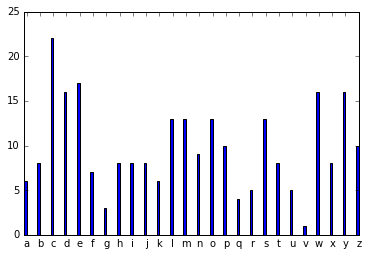

In [46]:
# Disguised Shift, it's a vigenére cipher as said from the first clue
plotFrequencyDistribution(message3)

In [47]:
# We know it is a 
# and that, from the first clue, "keyword is the hidden symbol of death in my favorite holbein"
# Holbein is an artist and his famous painting is The Ambassadors
# you can watch this video to go through the explanation of it 
# https://www.khanacademy.org/humanities/renaissance-reformation/northern/holbein/v/hans-holbein-the-younger-the-ambassadors-1533
# The skull is the hidden symbol of death in the painting
decryptWithWord(message3, "skull")

'sbqqcybininoygncsurepwhsxhplrbrmqjrppethevuvbuuzllwiysrphfnalihlcgtkschmttugtzwilthdyqskbacsjnvqsiowwqjgokorlplidextfotraaubdtjkyiscwfnuunebuzdndtmvttezizovfirealympcouswibsgxwscettmhrcqolmbezitbkoxpolgrhduthuarmtqxrnvssaoutwffithejumljbktraqdrccuzonevt'

In [48]:
# Well that didn't work...
# In hindsight I could see that the 2 was made pretty clear but that is not how I solved it
# "start" was the first part of the last message and didn't make sense if it were part of the sentence
def keywordFromKnown(encrypted, decrypted):
    keyword = []
    for i, enc in enumerate(encrypted):
        keyword.append(chr(((ord(enc)-ord(decrypted[i]))%26) +97))
    return "".join(keyword)

keywordFromKnown("klkbn", "start")

'sskku'

In [49]:
# So sskku looks a lot like skull so I'm not completely off base, the letters are just doubled
# if we try it with the letters doubled "sskkuullll"
decrypted3 = decryptWithWord(message3,"sskkuullll")
print(decrypted3)

answers['message3'] = decrypted3

startwarningiheardreportofourbreakinonthenewsstillwaitingonalarmtestschedulesiwillreportbacktomorrowwithfinalplanforextrasecurityisuggestweburnourlettersafterreadingandswitchourletterstonumbersusingpolybiussquaredropmessageunderthebenchattrainstationend


## Clue 3

In [50]:
# Weird looking...
message4 = "44541134541123335344541242434244325141212311311353155442544244424344325141534354324234411125513553341342432253431144543453432251343142143251341253341215541534513351444411225144425442444415345123551543213451111311212351425431533321424351445315341434512542531544335154325341443435135441"

In [51]:
# From message3 it says that the next message will be encrypted with a polybius square
# Didn't know what that was, google what it looked like and made one

# Creates a polybius square where [0][3] shows just 'i' but could also be 'j'
# Not a perfect one the i/j should be the same square change that with chr(+1) when x > 10
def createPolybiusSquare():
    square = []
    temp =[]
    for x in range(1,27):
        temp.append(chr(96+x))
        if x % 5 ==0:
            square.append(temp)
            temp = []
    return square
    
square = createPolybiusSquare()
square

[['a', 'b', 'c', 'd', 'e'],
 ['f', 'g', 'h', 'i', 'j'],
 ['k', 'l', 'm', 'n', 'o'],
 ['p', 'q', 'r', 's', 't'],
 ['u', 'v', 'w', 'x', 'y']]

In [52]:
# Convert the string of numbers into a list of tuples (coordinates)
numbers = list(map(int,list(message4)))
it = iter(numbers)
ps_points = list(zip(it,it))

In [53]:
# Decode the message with with square
def decryptPolybiusSquare(square, points):
    decrypted = []
    for x,y in points:
        decrypted.append(square[y-1][x-1])
    return "".join(decrypted)

decrypted4 = decryptPolybiusSquare(square, ps_points)
print(decrypted4)

answers['message4'] = decrypted4

startalmostfinishedblackoutitisinshedonthirdaveworkingonastrongercipherforfuturemessagesitissurelyunbreakableitcombinesourpreviousmethodsrwktd


## Clue 4   (The doosy)

In [57]:
hint1 = "oasis"
# 001001100
# 001010

# base 4
# 00,01,02,03,10,11,12,13...33

# 101101  -> pad -> 110110

# yes it is "percise" the person who was writing it was not as precise
# brilliantdrivendemandingpassionatepercise
# 00100110000101001010010001001101010100101


# newspaper first part
# the whole grain goodness of blue chip dividend stocks has its limits

In [58]:
int('101101',2), int('110110',2)

(45, 54)

In [59]:
int('011011',2)

27

In [60]:
45^27

54

In [74]:
# how I should have implemented it before...but didn't...
def plotDistributionComparison(given, random):    
    x, y = zip(*sorted(given.items()))
    x2, y2 = zip(*sorted(random.items()))
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    
    # n is number of letters (only lowercase in this case)
    n = np.arange(len(x))
    width = 0.2
    
    # Label x-axis
    ax1.set_xticks(n + width)
    ax1.set_xticklabels(x)
    
    # Plot the bar graph with n number rectangles using y (the heights with a width of (width))
    ax1.bar(n, y, width)
    ax1.set_title("Given")
    # Not a beautiful way of doing it but just gonna leave it for now
    ax2.set_xticks(n + width)
    ax2.set_xticklabels(x2)
    ax2.bar(n, y2, width)
    ax2.set_title("Random")

In [91]:
bitstring = '00100110000101001010010001001101010100101'
rand_bitstring = "".join([str(random.randint(0,1)) for x in range(0,len(bitstring))])

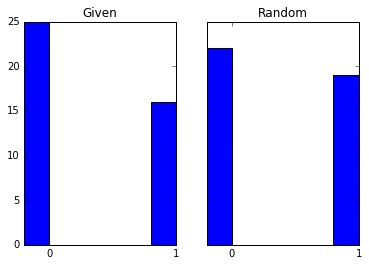

In [92]:
    one_vs_zero_given = {'0':0,'1':0}
one_vs_zero_random = {'0':0,'1':0}

# 
for x in bitstring:
    one_vs_zero_given[x] +=1

for x in rand_bitstring:
    one_vs_zero_random[x] +=1
    
plotDistributionComparison(one_vs_zero_given,one_vs_zero_random)

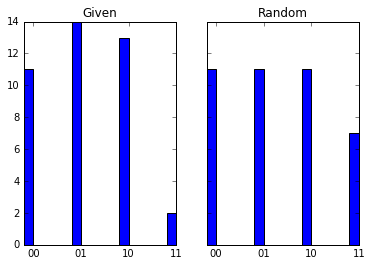

In [81]:
# *no flips given*
def twoFlipsDistributionFromBitString(bitstring):
    dist = {'00':0,'01':0,'10':0,'11':0}
    for ix, x in enumerate(bitstring):
        if ix < len(bitstring)-1:
            dist[x+bitstring[ix+1]] += 1
    return dist

two_flips_given = twoFlipsDistributionFromBitString(bitstring)
two_flips_random = twoFlipsDistributionFromBitString(rand_bitstring)
plotDistributionComparison(two_flips_given, two_flips_random)

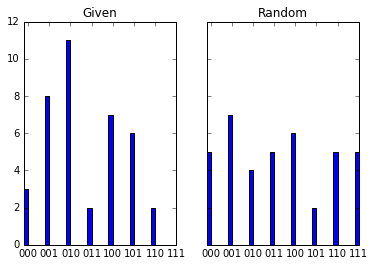

In [93]:
def threeFlipsDistributionFromBitString(bitstring):
    dist = {'000':0,'001':0,'011':0,'111':0,'110':0,'100':0,'010':0, '101':0}
    for ix, x in enumerate(bitstring):
        if ix < len(bitstring)-2:
            dist[x+bitstring[ix+1]+bitstring[ix+2]] += 1
    return dist

three_flips_given = threeFlipsDistributionFromBitString(bitstring)
three_flips_random = threeFlipsDistributionFromBitString(rand_bitstring)
plotDistributionComparison(three_flips_given, three_flips_random)

In [94]:
"""
Parts of the drawing (in base 4)
       0          0    3
       |           \  /           so something like           /      could be represented as 23 (base4)
   3 -   - 1                                                   
       |           /  \                                      |
       2          1    2
"""

'\nParts of the drawing (in base 4)\n       0          0    3\n       |           \\  /           so something like           /      could be represented as 23 (base4)\n   3 -   - 1                                                   \n       |           /  \\                                      |\n       2          1    2\n'

## Initial Code to Break
<img src="data/initial_code.jpg">

In [95]:
# What I realized is that the lines have 4 positions each for a total of 8 possible positions which can be represented
# as length 4 bit strings like "0001" or whatever is written on the hint


In [98]:
# another important part
"""
Parts of the drawing (in base 4)
       0          2    3
       |           \  /           so something like           /      could be represented as 23 (base4)
   3 -   - 1                                                   
       |           /  \                                      |
       2          1    0
"""
print()

In [178]:
paper_decoded = "20 33 22 21 00 33 30 01 02 20 22 02 32 20 11 33 03 30 03 32 03 00 22 01 33 23 23 10 03 22 13 13 20 01 11 03 22 20 20 20 22 33 20 13 23 13 33 22 30 33 01 20 21 10 12 11 00 32 23 13 22 02 00 10 31 02 33 20 31 03 12 01 11 33 32 23 02 01 00 32 10 10 30 01 10 23 31 10 02 00 30 23 31 10 03 03 01 02 33 02 23 21 30 12 03 12 22 00 03 13 31 00 10 11 21 03 23 02 20 13 02 32 30 31 23 33 20 02 12 33 30 00 30 12 30 13 03 01 03 03 23 22 02 30 20 03 22 23 32 23 02 02 31 20 23 13 30 02"
paper_base4_numbers = paper_decoded.split(" ")
paper_binary_numbers = [bin((int(num[0])*4)+(int(num[1])))[2:] for num in paper_base4_numbers]
# format((int(num[0])*4)+(int(num[1])),'04b')

In [188]:
pad_text = "the whole grain goodness of blue chip dividend stocks has its limits utility stocks consumer staples pipelines telecoms and real estate investment trusts have all lost ground over the past month even while the broader market has been flat with the bond market signalling an expectation of rising interest rates the five year rally for steady blue chip dividend payers has stalled should you be scared if you own a lot of these stocks either directly or through mutual funds or exchange traded funds david baskin president of baskin financial services has a two pronged answer keep your top quality dividend stocks but be prepared to follow his firms example in trimming holdings in stocks such as transcanada corp keyera corp and pembina pipeline corp lets have mr baskin run us through his thinking on dividend stocks which are the big part of the portfolios his firm puts together for clients a mini manifesto for the managers "
pad_text = pad_text.replace(" ","")

In [189]:
pad_text

'thewholegraingoodnessofbluechipdividendstockshasitslimitsutilitystocksconsumerstaplespipelinestelecomsandrealestateinvestmenttrustshavealllostgroundoverthepastmonthevenwhilethebroadermarkethasbeenflatwiththebondmarketsignallinganexpectationofrisinginterestratesthefiveyearrallyforsteadybluechipdividendpayershasstalledshouldyoubescaredifyouownalotofthesestockseitherdirectlyorthroughmutualfundsorexchangetradedfundsdavidbaskinpresidentofbaskinfinancialserviceshasatwoprongedanswerkeepyourtopqualitydividendstocksbutbepreparedtofollowhisfirmsexampleintrimmingholdingsinstockssuchastranscanadacorpkeyeracorpandpembinapipelinecorpletshavemrbaskinrunusthroughhisthinkingondividendstockswhicharethebigpartoftheportfolioshisfirmputstogetherforclientsaminimanifestoforthemanagers'

In [205]:
newspaper_binary = "".join(['1' if x in "aeiouy" else '0' for x in pad_text])
newspaper_binary

'0010010100110011001001000110010010101000010000101000101001010101001000010010100010010010101010010101001000110100101100100010000100001011000100001100101000101000100010100010100100110100100100100110001001000010100010010010010010010100100101101001010010010100010100010101111001001010001101001100100101010001110001000100100011001110100101010111100101010001010010001100100101000110000110001011001000101000100100101001000010100100100010101001001001001010011001001010010100100100101000100110111001001101010101010000100001001001010100101001001001000101000110001001000100100010001000010010001000101010100011101010010001001010101010101000100010100010010010100001100010001001001001010100001000001001010010100100100010100010110010010001000101001001000110001010101010100101000101010100'

In [212]:
res = []
for x, y in zip("".join(paper_binary_numbers),"".join(newspaper_binary)):
    res.append(str(int(x) ^ int(y)))

In [213]:
"".join(res)

'101010101001101001011010000011000000001111100000011101011100101001001011110101010100111001000010101010101110101000010000000000111011010100101101001101011000010001110110011001011110000101000101100010000000111100110111000100110100111101101011111000010100011000110111000000001000001110100011011110101010011000010011011100010111001111011010100100110000100010100110010001100011000001110101010011100111001101100011000010111001101101110001001110010110100111001111010011101000100100101001100101110'

In [190]:
line1_concat_base4 = ['20','33','22','21','00','33','30','01','02','20','22','02','32','20','11','33','03','30','03','32','03','00','22','01','33','23']

# Done with wrong method (zero and 2 flipped)
#line1_concat_base4 = ['22','33','20','21','02','33','32','01','00','22','20','00','30','22','11','33','03','32','03','30','03','02','20','01','33','23']
line1_base10 = [int(x,4) for x in line1_concat_base4]
line1_binary = [bin(int(x,4)) for x in line1_concat_base4]
line1_chars = [chr(int(x,4)+97) for x in line1_concat_base4]


In [ ]:
open me to read

In [191]:
104 ^ 15
#for x in range(0,26):
#    print(substitutionEncryptMessage("".join(line1_chars),x))
#pg

s = """1000111110101001000011111100000100101000101000101110100001011111001111000011111000110000101000011111101110110100001110100111011110000001010100111010100010001000100111111000011110110111111110101100111100011000100101000101010100011110101101111010001000000100110100101111100011010011011000010101111111101011001000010000111001000100110000010100101111010100001000000100101111010100001100110001001011110010101110011100011000110110101000000011011111010000010001011010010011101100101000011100101110110011011011111110000010011011111100000011000110110001110011000100110011101110100010110010000011101010111110101100100010110110001011011111000010"""
print(len(s)/3)
chunks, chunk_size = len(s), int(len(s)/211)
[ s[i:i+chunk_size] for i in range(0, chunks, chunk_size) ]

211.33333333333334


['100',
 '011',
 '111',
 '010',
 '100',
 '100',
 '001',
 '111',
 '110',
 '000',
 '010',
 '010',
 '100',
 '010',
 '100',
 '010',
 '111',
 '010',
 '000',
 '101',
 '111',
 '100',
 '111',
 '100',
 '001',
 '111',
 '100',
 '011',
 '000',
 '010',
 '100',
 '001',
 '111',
 '110',
 '111',
 '011',
 '010',
 '000',
 '111',
 '010',
 '011',
 '101',
 '111',
 '000',
 '000',
 '101',
 '010',
 '011',
 '101',
 '010',
 '001',
 '000',
 '100',
 '010',
 '011',
 '111',
 '100',
 '001',
 '111',
 '011',
 '011',
 '111',
 '111',
 '010',
 '110',
 '011',
 '110',
 '001',
 '100',
 '010',
 '010',
 '100',
 '010',
 '101',
 '010',
 '001',
 '111',
 '010',
 '110',
 '111',
 '101',
 '000',
 '100',
 '000',
 '010',
 '011',
 '010',
 '010',
 '111',
 '110',
 '001',
 '101',
 '001',
 '101',
 '100',
 '001',
 '010',
 '111',
 '111',
 '110',
 '101',
 '100',
 '100',
 '001',
 '000',
 '011',
 '100',
 '100',
 '010',
 '011',
 '000',
 '001',
 '010',
 '010',
 '111',
 '101',
 '010',
 '000',
 '100',
 '000',
 '010',
 '010',
 '111',
 '101',
 '010',


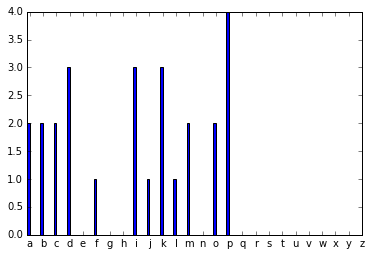

In [111]:
plotFrequencyDistribution("".join(line1_chars))

## Clue Easier to See
<img src="data/light_clue4_1.jpg">

97

In [399]:
2^3

1

In [413]:
int('33',4)

15

In [414]:
int('101101',2)

45

In [415]:
ord('t')

116

In [418]:
substitutionDecryptLetter('t',45)

'a'

In [437]:
len(line1_base10)

26

In [421]:
int('111111',2)

63

In [422]:
bin(6)

'0b110'

In [426]:
bin(ord('B'))

'0b1000010'

In [427]:
int('001001100',2)

76

In [430]:
ord('b')-76

22

In [434]:
ord('m')+ord('i')+ord('l')+ord('k') - (4*96)

45

In [435]:
781/45

17.355555555555554

In [436]:
bin(ord('m')-97)

'0b1100'

In [443]:
answers

{'message1': 'zenameblackoutworriedthatourcipheristooweakonnextmessageswitchtovigenerecipherkeywordisthehiddensymbolofdeathinmyfavoriteholbeinend',
 'message2': 'startigrabbedeverythingicouldfindpleasereturnanyblueprintsforvaultandalarmdesignbasedonwhichbankyoudecideoniamsettingupsafehouseco',
 'message3': 'startwarningiheardreportofourbreakinonthenewsstillwaitingonalarmtestschedulesiwillreportbacktomorrowwithfinalplanforextrasecurityisuggestweburnourlettersafterreadingandswitchourletterstonumbersusingpolybiussquaredropmessageunderthebenchattrainstationend',
 'message4': 'startalmostfinishedblackoutitisinshedonthirdaveworkingonastrongercipherforfuturemessagesitissurelyunbreakableitcombinesourpreviousmethodsrwktd'}

In [446]:
# THE CONSONANTS GENERATE 0'S AND VOWELS GENERATE 1'S
newspaper_text =     "brilliantdrivendemandingpassionatepercise" # pseudo random number generator
correlated_numbers = "00100110000101001010010001001101010100101"

original_newspaper_text = "thewholegraingoodnessofbluechipdividendstockshasitslimits"
psrand_bitstring = [1 if x in "aeiouy" else 0 for x in original_newspaper_text]
print("".join(map(str,psrand_bitstring)))

001001010011001100100100011001001010100001000010100010100


5

In [467]:
#   22,32,21,12,20,32
# [001,001,010,011,001,100]#   100100011001001010100001000010100010100

for x in [int('22',4)^int('001',2),int('32',4)^int('001',2),int('21',4)^int('100',2),int('12',4)^int('001',2),int('20',4)^int('010',2),int('32',4)^int('010',2)]:
    print(chr(x+96))

k
o
m
g
j
l


In [236]:
r = []
for x, y in zip('11010001101001',[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0]):
    r.append(int(x)^y)

In [242]:
[1 if x in "aeiouy" else 0 for x in "'openmetoread'"]

[0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0]

In [225]:
"".join()

TypeError: sequence item 0: expected str instance, int found

In [216]:
bin(ord('h'))[2:],bin(ord('i'))[2:]

('1101000', '1101001')

In [220]:
l = [list("abcdef"),
list("ghijkl"),
list("mnopqr"),
list("stuvwx"),
list("yz0123"),
list("456789")]

In [221]:
l

[['a', 'b', 'c', 'd', 'e', 'f'],
 ['g', 'h', 'i', 'j', 'k', 'l'],
 ['m', 'n', 'o', 'p', 'q', 'r'],
 ['s', 't', 'u', 'v', 'w', 'x'],
 ['y', 'z', '0', '1', '2', '3'],
 ['4', '5', '6', '7', '8', '9']]

In [240]:
r

[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [232]:
r

[0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0]

In [243]:
len([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

14

In [ ]:
01010010101100
11010001101001
10000011000101